# Welcome to the Main Code
### A quick rundown of the structure of the notebook:

#### Getting it running:
Make sure you have the following empty folders created in the directory you are in:

_export_csv_

_import_csv_

<br />
Make sure you have the following csv-files in the directory you are in:

_BACI_HS22_Y2022_V202401b.csv_

_country_codes_V202401b.csv_

<br />

-- Note these are available at: https://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=37 

#### Structure:
First we import and define our initial directed and weighted graph G.
All functionality for this graph will run through the class weightedDiGraph()

Afterwards, we define and create a bipartite graph B, based on G.
All functionality for this graph through the class weightedBiGraph()

In [1]:
# TO DO: 
# Convert the network into a bipartite/pseudo-bipartite network, between importers on one side and exporters on the other
# Already doing this we would have done a lot of network analysis and shown off a lot
# Then also include a previous years' network and we can do a comparison between the two

# We can remove edges with weights below a certain value and see what remains of our network.

In [2]:
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
from networkx.algorithms import bipartite as bpt

import glob

In [3]:
# Point to the 2022 BACI csv dataset
file_path = "BACI_HS22_Y2022_V202401b.csv"

In [4]:
# Our product code for historical artifacts, saved as a list if we want to include multiple product codes
product_codes = [970610]

In [5]:
# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
filtered_data = pd.concat(
    chunk[chunk.index.get_level_values('k').isin(product_codes)] for chunk in pd.read_csv(
        file_path, chunksize=10000, index_col=[0, 1, 2, 3, 4, 5]  # Adjust this list to match your Multi-Index levels
    )
)

### The codes for each index:
't' = year

'i' = exporter

'j' = importer

'k' = product

'v' = value

'q' = quantity

In [6]:
# DO NOT RUN YET - Code is created to work on a MultiIndex, so we have 0 columns. If we want columns, reset index below

# We reset the index to make sure the columns work as intended, as pandas currently treats this as a MultiIndex (complicado, no me gusta)
#filtered_data = filtered_data.reset_index()

# This will give us the clearly defined columns
#print(filtered_data.columns)

In [7]:
print(filtered_data)

Empty DataFrame
Columns: []
Index: [(2022, 4, 276, 970610, 1.759,         0.003), (2022, 4, 372, 970610, 36.632,         0.015), (2022, 4, 826, 970610, 33.359,         0.034), (2022, 4, 842, 970610, 3.823,         0.002), (2022, 8, 757, 970610, 2.589,         0.013), (2022, 12, 757, 970610, 14.555,         0.004), (2022, 24, 842, 970610, 367.979,         0.029), (2022, 31, 826, 970610, 24.165,         0.012), (2022, 31, 842, 970610, 214.325,         0.065), (2022, 32, 251, 970610, 3.313,         0.002), (2022, 32, 348, 970610, 0.192,            NA), (2022, 32, 842, 970610, 159.839,        40.315), (2022, 36, 246, 970610, 8.567,         0.002), (2022, 36, 276, 970610, 2.984,         0.002), (2022, 36, 372, 970610, 11.188,         0.004), (2022, 36, 380, 970610, 6.303,         0.014), (2022, 36, 528, 970610, 1.391,         0.022), (2022, 36, 554, 970610, 22.597,            NA), (2022, 36, 757, 970610, 1.732,         0.003), (2022, 36, 826, 970610, 519.759,         0.988), (2022, 36, 842,

In [8]:
# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_exporter = {exporter: data for exporter, data in filtered_data.groupby(level='i')}


# Optionally, you can save each DataFrame to a CSV file if needed
for exporter, df in datasets_by_exporter.items():
    output_file = f"export_csv/dataset_for_exporter_{exporter}.csv"  # Modify the filename as needed
    df.to_csv(output_file)  # Save to CSV
    print(f"Saved dataset for exporter {exporter} to {output_file}")
    


Saved dataset for exporter 4 to export_csv/dataset_for_exporter_4.csv
Saved dataset for exporter 8 to export_csv/dataset_for_exporter_8.csv
Saved dataset for exporter 12 to export_csv/dataset_for_exporter_12.csv
Saved dataset for exporter 24 to export_csv/dataset_for_exporter_24.csv
Saved dataset for exporter 31 to export_csv/dataset_for_exporter_31.csv
Saved dataset for exporter 32 to export_csv/dataset_for_exporter_32.csv
Saved dataset for exporter 36 to export_csv/dataset_for_exporter_36.csv
Saved dataset for exporter 40 to export_csv/dataset_for_exporter_40.csv
Saved dataset for exporter 48 to export_csv/dataset_for_exporter_48.csv
Saved dataset for exporter 51 to export_csv/dataset_for_exporter_51.csv
Saved dataset for exporter 56 to export_csv/dataset_for_exporter_56.csv
Saved dataset for exporter 68 to export_csv/dataset_for_exporter_68.csv
Saved dataset for exporter 76 to export_csv/dataset_for_exporter_76.csv
Saved dataset for exporter 100 to export_csv/dataset_for_exporter_10

In [9]:
datasets_by_importer = {importer: data for importer, data in filtered_data.groupby(level='j')}

for importer, df in datasets_by_importer.items():
    output_file = f'import_csv/dataset_for_importer_{importer}.csv' 
    df.to_csv(output_file)
    print(f"Saved dataset for importer {importer} to {output_file}")

Saved dataset for importer 8 to import_csv/dataset_for_importer_8.csv
Saved dataset for importer 20 to import_csv/dataset_for_importer_20.csv
Saved dataset for importer 31 to import_csv/dataset_for_importer_31.csv
Saved dataset for importer 32 to import_csv/dataset_for_importer_32.csv
Saved dataset for importer 36 to import_csv/dataset_for_importer_36.csv
Saved dataset for importer 40 to import_csv/dataset_for_importer_40.csv
Saved dataset for importer 48 to import_csv/dataset_for_importer_48.csv
Saved dataset for importer 51 to import_csv/dataset_for_importer_51.csv
Saved dataset for importer 56 to import_csv/dataset_for_importer_56.csv
Saved dataset for importer 60 to import_csv/dataset_for_importer_60.csv
Saved dataset for importer 76 to import_csv/dataset_for_importer_76.csv
Saved dataset for importer 92 to import_csv/dataset_for_importer_92.csv
Saved dataset for importer 100 to import_csv/dataset_for_importer_100.csv
Saved dataset for importer 104 to import_csv/dataset_for_importe

In [10]:
unique_exporters = filtered_data.index.get_level_values('i').unique()
print(f"Index of unique exporters: {unique_exporters}")

unique_importers = filtered_data.index.get_level_values('j').unique()
print(f'Index of unique importers: {unique_importers}')

Index of unique exporters: Index([  4,   8,  12,  24,  31,  32,  36,  40,  48,  51,
       ...
       795, 804, 818, 826, 842, 858, 860, 862, 887, 894],
      dtype='int64', name='i', length=110)
Index of unique importers: Index([276, 372, 826, 842, 757, 251, 348, 246, 380, 528, 554,  32,  36,  56,
       100, 124, 156, 191, 196, 203, 208, 233, 300, 344, 376, 392, 410, 440,
       442, 490, 579, 616, 620, 642, 643, 699, 703, 705, 724, 752, 792,  40,
       136, 152, 484, 634, 702, 764, 784, 470, 591, 116, 422, 446, 458, 586,
       710,  20,  76, 320, 360, 414, 504, 512, 682, 704, 268, 804, 352, 516,
       188, 368,  92, 428,   8,  31,  48,  60, 104, 292, 400, 496, 558, 585,
       688, 800, 860, 887,  51, 214, 462, 524, 533, 566, 604],
      dtype='int64', name='j')


In [11]:
# Our number of nodes / number of exporting countries: 110
print(len(unique_exporters))
print(len(unique_importers))

110
95


In [12]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "export_csv/*.csv"  # Adjust this path as needed

# Create a dictionary to store combined quantities for each importer
combined_quantities = {}

# Load each CSV file and aggregate the quantities
for file in glob.glob(path_to_csvs):
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)

    # Ensure 'q' is numeric and coerce errors to NaN
    df['v'] = pd.to_numeric(df['v'], errors='coerce')

    # Group by importer (j) and sum the quantities (q)
    quantities_by_importer = df.groupby(level='j')['v'].sum()  # NA values will be ignored by default

    # Combine results
    for importer, quantity in quantities_by_importer.items():
        if pd.isna(quantity):  # Check for NaN
            quantity = 0  # Treat NaN as 0 for aggregation

        if importer in combined_quantities:
            combined_quantities[importer] += quantity
        else:
            combined_quantities[importer] = quantity

# Convert combined_quantities dictionary to DataFrame for better visualization
combined_quantities_df = pd.DataFrame.from_dict(combined_quantities, orient='index', columns=['Total Value'])
combined_quantities_df.reset_index(inplace=True)
combined_quantities_df.rename(columns={'index': 'Importer'}, inplace=True)

# Sort the DataFrame by the 'Importer' (country code) column
combined_quantities_df.sort_values(by='Importer', inplace=True)

# Display the combined quantities for each importer
print(combined_quantities_df)

# Save the combined quantities to a CSV file if needed
combined_quantities_df.to_csv("combined_quantities_by_importer.csv", index=False)

    Importer  Total Value
74         8        9.861
41        20        5.506
75        31       36.322
65        32      189.102
19        36     7793.485
..       ...          ...
64       804       24.385
18       826   146383.294
1        842   273964.843
86       860      980.459
87       887        2.514

[95 rows x 2 columns]


In [13]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "export_csv/*.csv"  # Adjust this path as needed

# Initialize a directed graph
G = nx.DiGraph()

# Load each CSV file and create edges for the directed graph
for file in glob.glob(path_to_csvs):
    # Read the CSV file
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)
    
    # Ensure 'q' is numeric and coerce errors to NaN
    df['v'] = pd.to_numeric(df['v'], errors='coerce')

    # Iterate over each row and add edges to the graph
    for (t, exporter, importer), group in df.groupby(level=[0, 1, 2]):
        total_quantity = group['v'].sum(skipna=True)  # Sum quantities for the current exporter-importer pair
        if pd.notna(total_quantity):  # Ensure total_quantity is not NaN
            G.add_edge(exporter, importer, weight=total_quantity)

# Optional: You can visualize or analyze the graph now
print("Nodes in the graph:", G.number_of_nodes())
print("Edges in the graph:", G.number_of_edges())

# Optional: To save the graph to a file (e.g., GML format)
#nx.write_gml(G, "export_import_graph.gml")

Nodes in the graph: 126
Edges in the graph: 952


In [14]:
class weightedDiGraph:
    '''
    Class gathering several functions for working with our standard directed, weighted bigraph. 
    Does not work with bipartite networks.
    
    
    Functions:
        _counting_degree_diGraph = 
        cumulative_degree_plot = 
        
        _closeness_centrality = 
        _average_neighbor_degree = 
        _betweenness_centrality = 
        _clustering_coefficient = 
        _maximum_shortest_path = 
        summary()
    '''
    
    
    
    def __init__(self, graph = None):
        self._graph = graph

    def _counting_degrees_diGraph(self):
        '''
        A function that counts the total number of in and out degrees for each key value. Returns two lists of tuples.

            Input:
        graph = Your nx.diGraph

            Output:
        out_degree_list = A list of tuples, with the first value corresponding to the degree and the second value to nodes with
        said degree in the network. e.g (0, 25) -> 25 nodes have an outdegree 0
        in_degree_list = Same as above.
        '''
        out_degree = list(self._graph.out_degree)
        out_degree.sort()
        in_degree = list(self._graph.in_degree)
        in_degree.sort()


        out_degree_totals = []
        out_degree_counts = {}
        out_degree_list = []
        for i in out_degree:
            out_degree_totals.append(i[1])
        for i in out_degree_totals:
            out_degree_counts[i] = out_degree_totals.count(i)
        for key in out_degree_counts:
            out_degree_list.append((key, out_degree_counts[key]))


        # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
        out_degree_list.sort()

        min_out_degree = out_degree_list[0][0]  # Get the minimum degree value
        max_out_degree = out_degree_list[-1][0]  # Get the maximum degree value

        # Loop over the range from min to max, adding missing values with count 0
        for degree in range(min_out_degree, max_out_degree + 1):
            if degree not in out_degree_counts:
                out_degree_list.append((degree, 0))



        in_degree_totals = []
        in_degree_counts = {}
        in_degree_list = []
        for i in in_degree:
            in_degree_totals.append(i[1])
        for i in in_degree_totals:
            in_degree_counts[i] = in_degree_totals.count(i)
        for key in in_degree_counts:
            in_degree_list.append((key, in_degree_counts[key]))



        # ADDED CODE TO ADD 0 FREQUENCY COUNTS, UP TO HIGHEST VALUE
        out_degree_list.sort()

        min_in_degree = in_degree_list[0][0]  # Get the minimum degree value
        max_in_degree = in_degree_list[-1][0]  # Get the maximum degree value

        # Loop over the range from min to max, adding missing values with count 0
        for degree in range(min_in_degree, max_in_degree + 1):
            if degree not in in_degree_counts:
                in_degree_list.append((degree, 0))


        out_degree_list.sort()
        in_degree_list.sort()

        return out_degree_list, in_degree_list


    def cumulative_degree_plot(self):
        '''
        To be expanded - A simple plot function for creating a cumulative degree plot

            Input:
        A degree list of tuples, as created by counting_degree_diGraph()

            Output:
        A plt.plot created from the two values in the tuples.
        '''
        out_degree_list, in_degree_list = self._counting_degrees_diGraph()
        
        out_degree_index_list = []
        out_degree_value_list = []
        out_degree_cumul_list = []

        for i in out_degree_list:
            out_degree_index_list.append(i[0])
            out_degree_value_list.append(i[1])

        for i in range(len(out_degree_index_list)):
            out_degree_cumul_list.append(np.sum(out_degree_value_list[i:]))
            
            
            
            
        in_degree_index_list = []
        in_degree_value_list = []
        in_degree_cumul_list = []

        for i in in_degree_list:
            in_degree_index_list.append(i[0])
            in_degree_value_list.append(i[1])

        for i in range(len(in_degree_index_list)):
            in_degree_cumul_list.append(np.sum(in_degree_value_list[i:]))


        #list1 = []
        #list2 = []

        #for i in range(len(degree_list)):
        #    list1.append(degree_list[i][0])
        #    list2.append(degree_list[i][1])

        
        # Create plots
        fig, ax = plt.subplots()
        out_plot, = ax.plot(out_degree_index_list, out_degree_cumul_list, label="Out-Degree", color="blue")
        in_plot, = ax.plot(in_degree_index_list, in_degree_cumul_list, label="In-Degree", color="orange")

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("Degree")
        ax.set_ylabel("Cumulative Count")
        ax.set_title("Cumulative degree plot")
        ax.legend()

        return out_plot, in_plot
    

    def _closeness_centrality(self):
        '''
        Small function for finding the node centrality of our network. Returns a sorted list of tuples and the highest value node.

        Input:
            graph = A networkx graph

        Output:
            node_centrality_tuples = A sorted list of tuples for each of the nodes, with their degree centrality.
            maxtup = A tuple for the highest value node.
        '''
        node_centrality = nx.degree_centrality(self._graph)
        node_centrality_tuples = sorted(node_centrality.items())
        maxtup = (0,0)


        for i in node_centrality_tuples:
            if i[1] > maxtup[1]:
                maxtup = i

        return node_centrality_tuples, maxtup

    def _average_neighbor_degree(self):
        '''
        Small function for finding the average degree of the neighbors to each node in the graph. Good for finding hubs.

        Input:
            graph = A networkx graph

        Output:
            avg_neighbor_degree_tuples = A sorted list of tuples for each of the nodes, with their average neighbor degree.
            maxdic = A dictionary of the highest value nodes.

            OPTIONAL maxtup = A tuple for the highest value node.
        '''

        average_neighbor_degree_dict = nx.average_neighbor_degree(self._graph)

        avg_neighbor_degree_tuples = sorted(average_neighbor_degree_dict.items())
        maxtup = (0,0)
        maxdic = {}

        for i in avg_neighbor_degree_tuples:
            if i[1] > maxtup[1]:
                maxtup = i

        for i in avg_neighbor_degree_tuples:
            if i[1] == maxtup[1]:
                maxdic[i[0]] = i[1]

        return avg_neighbor_degree_tuples, maxdic #, maxtup

    def _betweenness_centrality(self):
        '''
        Small function for finding the betweenness centrality - 
        Betweenness centrality is a measure used in network analysis to quantify the importance of a node within a graph 
        based on the number of shortest paths that pass through it. 
        It reflects how much a node acts as a bridge or mediator in the network.

        Input:
            graph = A networkx graph

        Output:
            betw_cen_tuples = A sorted list of tuples for each of the nodes, with their betweenness centrality.
            maxtup = A tuple for the highest value node.

        '''

        betw_cen = nx.betweenness_centrality(self._graph)

        betw_cen_tuples = sorted(betw_cen.items())
        maxtup = (0,0)

        for i in betw_cen_tuples:
            if i[1] > maxtup[1]:
                maxtup = i

        return betw_cen_tuples, maxtup


    def _clustering_coefficient(self):
        '''
        Small function for finding the clustering coefficient

        Input:
            graph = A networkx graph

        Output:
            clust_co_tuples = A sorted list of tuples for each of the nodes, with their clustering coefficient
            maxdic = A dictionary for the highest value nodes

            OPTIONAL maxtup = A tuple for the maximum value. Logically not sound, as many nodes will share clustering coefficients.
        '''

        clust_co = nx.clustering(self._graph)

        clust_co_tuples = sorted(clust_co.items())

        maxtup = (0,0)
        maxdic = {}

        for i in clust_co_tuples:
            if i[1] > maxtup[1]:
                maxtup = i

        for i in clust_co_tuples:
            if i[1] == maxtup[1]:
                maxdic[i[0]] = i[1]

        return clust_co_tuples, maxdic #, maxtup

    def _maximum_shortest_path(self):
        '''
        As we have a weakly connected graph, we can not directly find the diameter of our graph.
        Instead we must find the longest path within any two connected nodes in the network.

        Input:
            graph = A networkx graph

        Output:
            diameter = An integer that shows the longest path between two connected nodes.

        '''
        diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(self._graph)]) # maximum distance of a list containing the shortest paths between any two nodes in the graph (computed with Dijkstra's algorithm)

        # If you want to understand how the code works/runs, use the following:
        #for (i, j) in nx.shortest_path_length(graph):
        #    print(f'this is i: {i}')
        #    print(f'this is j: {j.values()}')

        # TO BE ADDED
        # Save the i-country to understand which nodes have the longest path.

        return diameter
    
    def summary(self):
        # Node degree centrality
        node_centrality_tuple_list, max_node_centrality = self._closeness_centrality()
        avg_neighbor_deg_tuple, max_avg_neighbor_deg = self._average_neighbor_degree()
        between_centr_tuple, max_between_centr = self._betweenness_centrality()
        clust_coe_tup, maxdic_clust = self._clustering_coefficient()
        longest_path = self._maximum_shortest_path()

        print(f'Our maximum node centrality is: {max_node_centrality}')
        print()
        print(f'Our maximum average neighbor degree nodes are: {list(max_avg_neighbor_deg.keys())} and they have value {list(max_avg_neighbor_deg.values())[0]}')
        print()
        print(f'Our maximum betweenness centrality node is: {max_between_centr}')
        print()
        print(f'Our maximum clustering coefficient nodes are: {list(maxdic_clust.keys())} and they have value {list(maxdic_clust.values())[0]}')
        print()
        print(f'Our longest path in the network is: {longest_path}')
    
    
    # def _graph_transitivity(self):
    # nx.transitivity(self._graph)


In [15]:
diGraph = weightedDiGraph(G)

In [16]:
diGraph.summary()

Our maximum node centrality is: (826, 1.1280000000000001)

Our maximum average neighbor degree nodes are: [48, 466, 516, 682, 740, 762, 804] and they have value 78.0

Our maximum betweenness centrality node is: (826, 0.23241688323755536)

Our maximum clustering coefficient nodes are: [8, 31, 32, 51, 60, 68, 100, 116, 136, 144, 180, 188, 214, 231, 233, 268, 352, 400, 422, 434, 440, 504, 524, 608, 642, 682, 688, 705, 760, 795, 804, 858, 860, 887] and they have value 1.0

Our longest path in the network is: 4


In [17]:
# We can save the different connected subnetworks as generator sets of nodes.
component_test = nx.weakly_connected_components(G)

# Our largest connected network can be found like this - Right now it returns all 126 nodes?? How come
largest_cc = max(nx.weakly_connected_components(G), key=len)
len(largest_cc)

126

In [18]:
# THINGS WE SHOULD FIND:
# Degree distribution (DONE!)
# Average path length - Diameter
# Closeness Centrality
# Clustering Coefficient

### Creating our bipartite graph B
We wish to work our directed weighted graph into a bipartite network.

In [19]:
# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
# We need to work with the countries, to get the names on the nodes.
file_path_countries = "country_codes_V202401b.csv"

filtered_countries = pd.concat(
    chunk for chunk in pd.read_csv(
        file_path_countries, chunksize=10000, index_col=[0, 1, 2, 3]  # Adjust this list to match your Multi-Index levels
    )
)

In [20]:
# Initialize a dictionary to store edges with weights
edges = defaultdict(float)

# Iterate through the datasets_by_exporter dictionary
for exporter, df in datasets_by_exporter.items():
    # Iterate through each row in the DataFrame
    for idx, row in df.iterrows():
        # Extract importer (j), exporter (i), and transaction value (v)
        exporter = idx[1]  # 'i' level from MultiIndex
        importer = idx[2]  # 'j' level from MultiIndex
        value = idx[4]   # 'v' column value

        # Add the value to the corresponding (importer, exporter) edge
        edges[(exporter, importer)] += value

# Convert defaultdict back to a normal dictionary (optional)
edges = dict(edges)

print(edges)


{(4, 276): 1.759, (4, 372): 36.632, (4, 826): 33.359, (4, 842): 3.823, (8, 757): 2.589, (12, 757): 14.555, (24, 842): 367.979, (31, 826): 24.165, (31, 842): 214.325, (32, 251): 3.313, (32, 348): 0.192, (32, 842): 159.839, (36, 246): 8.567, (36, 276): 2.984, (36, 372): 11.188, (36, 380): 6.303, (36, 528): 1.391, (36, 554): 22.597, (36, 757): 1.732, (36, 826): 519.759, (36, 842): 46.462, (40, 32): 8.951, (40, 36): 62.233, (40, 56): 2.92, (40, 100): 0.398, (40, 124): 72.395, (40, 156): 233.325, (40, 191): 1.885, (40, 196): 1.237, (40, 203): 7.702, (40, 208): 1.531, (40, 233): 0.31, (40, 246): 0.2, (40, 251): 125.54, (40, 276): 83.202, (40, 300): 1.869, (40, 344): 1143.926, (40, 348): 13.871, (40, 372): 4.08, (40, 376): 56.432, (40, 380): 36.132, (40, 392): 254.361, (40, 410): 1.028, (40, 440): 0.164, (40, 442): 0.269, (40, 490): 231.12, (40, 528): 13.628, (40, 579): 0.776, (40, 616): 5.542, (40, 620): 3.874, (40, 642): 2.847, (40, 643): 8.62, (40, 699): 34.536, (40, 703): 1.873, (40, 705)

In [21]:
edges.keys()

dict_keys([(4, 276), (4, 372), (4, 826), (4, 842), (8, 757), (12, 757), (24, 842), (31, 826), (31, 842), (32, 251), (32, 348), (32, 842), (36, 246), (36, 276), (36, 372), (36, 380), (36, 528), (36, 554), (36, 757), (36, 826), (36, 842), (40, 32), (40, 36), (40, 56), (40, 100), (40, 124), (40, 156), (40, 191), (40, 196), (40, 203), (40, 208), (40, 233), (40, 246), (40, 251), (40, 276), (40, 300), (40, 344), (40, 348), (40, 372), (40, 376), (40, 380), (40, 392), (40, 410), (40, 440), (40, 442), (40, 490), (40, 528), (40, 579), (40, 616), (40, 620), (40, 642), (40, 643), (40, 699), (40, 703), (40, 705), (40, 724), (40, 752), (40, 757), (40, 792), (40, 826), (40, 842), (48, 826), (51, 757), (51, 826), (56, 36), (56, 40), (56, 124), (56, 136), (56, 152), (56, 156), (56, 251), (56, 276), (56, 344), (56, 376), (56, 380), (56, 392), (56, 410), (56, 442), (56, 484), (56, 490), (56, 528), (56, 554), (56, 579), (56, 634), (56, 643), (56, 699), (56, 702), (56, 757), (56, 764), (56, 784), (56, 792)

In [22]:
exporter_list = set()
importer_list = set()
for key, value in edges.items():
    first_entry = key[0]  # Access the first element of the tuple
    second_entry = key[1]
    exporter_list.add(first_entry)
    importer_list.add(second_entry)

print(len(importer_list))
print(len(exporter_list))




95
110


In [23]:
# Create an empty directed graph
B = nx.DiGraph()

# Distinguish exporters and importers by prefixing node names
for (importer, exporter), weight in edges.items():
    exporter_node = f"e_{exporter}"  # Prefix exporter nodes
    importer_node = f"i_{importer}"  # Prefix importer nodes
    
    # Add the edge with the weight
    B.add_edge(exporter_node, importer_node, weight=weight)


def graph_info(Graph):
    info = (
        f"Graph with {Graph.number_of_nodes()} nodes and {Graph.number_of_edges()} edges.\n"
        f"Is directed: {Graph.is_directed()}\n"
        f"Average degree: {sum(dict(Graph.degree()).values()) / Graph.number_of_nodes():.2f}"
    )
    return info

print(graph_info(B))
print()
print(nx.is_bipartite(B))


Graph with 205 nodes and 952 edges.
Is directed: True
Average degree: 9.29

True


In [67]:
class weightedBiGraph:
    '''
    Class for a number of functions for use on the bipartite network.
    
    Note: For the way the Bipartite Network is implemented in networkx, many functions require a list of either of the two bipartite nodes.
    These are defined as self._exporter_list and self._importer_list in the initialisation.
    
    Functions:
        _maximum_cardinality_matching
        _clustering_coefficient
        _average_clustering
        _closeness_centrality
        _degree_centrality
        _betweenness_centrality
        summary()
    
    '''
    
    def __init__(self, graph = None, exporter_list = None, importer_list = None):
        self._graph = graph
        self._exporter_list = bpt.sets(self._graph)[0]
        self._importer_list = bpt.sets(self._graph)[1]
        
    
    def _maximum_cardinality_matching(self):
        '''
        Returns the maximum cardinality of the bipartite graph, using hopcroft_karp_matching.
        
        A matching is a set of edges that do not share any nodes. 
        A maximum cardinality matching is a matching with the most edges possible. 
        It is not always unique. 
        Finding a matching in a bipartite graph can be treated as a networkx flow problem.
        
        
        Input:
            _graph = A networkx bipartite graph

        Output:
            maximum_cardinality = A dictionary showing the maximum cardinality paired nodes.
        '''
        
        maximum_cardinality = bpt.hopcroft_karp_matching(self._graph, self._exporter_list)
        
        return maximum_cardinality
        
    def _clustering_coefficient(self):
        '''
        
        Compute a bipartite clustering coefficient for nodes.
        The bipartite clustering coefficient is a measure of local density of connections.
        
        
        Input:
            _graph = A networkx bipartite graph.
            _exporter_list = A list of one set of nodes in the bipartite graph.
            
        Output:
            clustering_coeff = A dictionary keyed by node with the clustering coefficient value.
            maxtup = The maximum tuple in the dict

        
        '''
        clustering_coeff = bpt.clustering(self._graph, self._exporter_list, mode='dot')
        
        clustering_tuples = sorted(clustering_coeff.items())
        maxtup = (0,0)


        for i in clustering_tuples:
            if i[1] > maxtup[1]:
                maxtup = i
        
        return clustering_coeff, maxtup
        
    def _average_clustering(self):
        '''
        Compute the average bipartite clustering coefficient.
        
        
        Input:
            _graph = A networkx bipartite graph.
            
        Output:
            avg_clust = A float of the average bipartite clustering for the given set of nodes 
            or the entire graph if no nodes are specified.

        '''
        
        avg_clust = bpt.average_clustering(self._graph)
        
        return avg_clust
    
    def _closeness_centrality(self):
        '''
        Compute the closeness centrality for nodes in a bipartite network.
        
        The closeness of a node is the distance to all other nodes in the graph
        or in the case that the graph is not connected to all other nodes in the connected component containing that node.
        
        
        Input:
            _graph = A networkx bipartite graph.
            _exporter_list = A list of one set of nodes in the bipartite graph.
            
        Output:
            closeness_centrality = Dict keyed by node with bipartite closeness centrality as the value.
            maxtup = The maximum tuple in the dict
            closeness_tuple = A sorted list of the tuples, with highest value at index [0]
            
        '''
        
        closeness_centrality = bpt.closeness_centrality(self._graph, self._exporter_list)
        
        closeness_tuples = sorted(closeness_centrality.items())
        maxtup = (0,0)


        for i in closeness_tuples:
            if i[1] > maxtup[1]:
                maxtup = i
                
        closeness_tuples.sort(reverse=True,key=lambda x: x[1])
        
        return closeness_centrality, maxtup, closeness_tuples
    
    
    def _degree_centrality(self):
        '''
        Compute the degree centrality for nodes in a bipartite network.
        
        The degree centrality for a node 'v' is the fraction of nodes connected to it.
        
        
        Input:
            _graph = A networkx bipartite graph.
            _exporter_list = A list of one set of nodes in the bipartite graph.
        
        Output:
            degree_centrality = Dict keyed by node with bipartite degree centrality as the value.
            maxtup = The maximum tuple in the dict
            closeness_tuple = A sorted list of the tuples, with highest value at index [0]
        
        '''
        
        degree_centrality = bpt.degree_centrality(self._graph, self._exporter_list)
        
        degree_cen_tuples = sorted(degree_centrality.items())
        maxtup = (0,0)


        for i in degree_cen_tuples:
            if i[1] > maxtup[1]:
                maxtup = i
                
        degree_cen_tuples.sort(reverse=True,key=lambda x: x[1])
        
        return degree_centrality, maxtup, degree_cen_tuples
    
    
    def _betweenness_centrality(self):
        '''
        Compute betweenness centrality for nodes in a bipartite network.
        
        Betweenness centrality of a node 'v' is the sum of the fraction of all-pairs shortest paths that pass through 'v'.
        
        
        Input:
            _graph = A networkx bipartite graph.
            _exporter_list = A list of one set of nodes in the bipartite graph.
        
        Output:
            betweenness_centrality = Dict keyed by node with bipartite betweenness centrality as the value.
            maxtup = The maximum tuple in the dict
            closeness_tuple = A sorted list of the tuples, with highest value at index [0]

        '''
        
        betweenness_centrality = bpt.betweenness_centrality(self._graph, self._exporter_list)
        
        betweenness_tuples = sorted(betweenness_centrality.items())
        maxtup = (0,0)


        for i in betweenness_tuples:
            if i[1] > maxtup[1]:
                maxtup = i
                
        betweenness_tuples.sort(reverse=True,key=lambda x: x[1])
        
        return betweenness_centrality, maxtup, betweenness_tuples
    
    def summary(self):
        '''
        Calls other functions to summarise values for the bipartite graph.
        
        No input needed!
        '''
        max_cardi = self._maximum_cardinality_matching()
        clust_coeff, clust_coeff_maxtup = self._clustering_coefficient()
        avg_clust = self._average_clustering()
        close_cent, close_cent_maxtup, cc_tuple_list = self._closeness_centrality()
        deg_cent, deg_cent_maxtup, dc_tuple_list = self._degree_centrality()
        betw_cent, betw_cent_maxtup, bc_tuple_list = self._betweenness_centrality()
        
        print(f'The max cardinality matching is: {max_cardi}')
        print(f'The length of this matching is: {len(max_cardi)}')
        print()
        print(f'Our clustering coefficients are: {clust_coeff}')
        print(f'The maximum clustering coefficient value is: {clust_coeff_maxtup}')
        print()
        print(f'The average clustering for the network is: {avg_clust}')
        print()
        print(f'The closeness centrality for our nodes is: {close_cent}')
        print(f'The maximum closeness centrality value is: {close_cent_maxtup}')
        print(f'Closeness centrality list: {cc_tuple_list}')
        print()
        print(f'The degree centrality for our nodes is: {deg_cent}')
        print(f'The maximum degree centrality value is: {deg_cent_maxtup}')
        print(f'Degree centrality list: {dc_tuple_list}')
        print()
        print(f'The betweenness centrality for our nodes is: {betw_cent}')
        print(f'The maximum betweenness centrality value is: {betw_cent_maxtup}')
        print(f'Degree centrality list: {bc_tuple_list}')

In [68]:
biGraph = weightedBiGraph(B)

In [69]:
biGraph.summary()

The max cardinality matching is: {'e_842': 'i_4', 'e_558': 'i_826', 'e_56': 'i_608', 'e_710': 'i_156', 'e_752': 'i_124', 'e_533': 'i_842', 'e_554': 'i_36', 'e_484': 'i_56', 'e_156': 'i_792', 'e_320': 'i_251', 'e_392': 'i_300', 'e_372': 'i_388', 'e_784': 'i_368', 'e_40': 'i_348', 'e_124': 'i_116', 'e_344': 'i_490', 'e_188': 'i_724', 'e_516': 'i_710', 'e_446': 'i_344', 'e_203': 'i_704', 'e_442': 'i_616', 'e_705': 'i_40', 'e_152': 'i_699', 'e_470': 'i_757', 'e_348': 'i_32', 'e_251': 'i_152', 'e_643': 'i_246', 'e_642': 'i_276', 'e_196': 'i_579', 'e_704': 'i_752', 'e_579': 'i_208', 'e_699': 'i_512', 'e_360': 'i_702', 'e_380': 'i_442', 'e_440': 'i_380', 'e_826': 'i_31', 'e_703': 'i_643', 'e_757': 'i_8', 'e_512': 'i_784', 'e_764': 'i_620', 'e_276': 'i_68', 'e_376': 'i_764', 'e_702': 'i_104', 'e_300': 'i_203', 'e_682': 'i_528', 'e_591': 'i_76', 'e_36': 'i_191', 'e_458': 'i_364', 'e_246': 'i_392', 'e_792': 'i_818', 'e_528': 'i_100', 'e_490': 'i_372', 'e_208': 'i_410', 'e_620': 'i_376', 'e_724':

## Summing up our findings so far:

Out of the 126 countries participating in the trade in historical artifacts in 2022, only 95 of them are importers of these same products.

There are 952 connections between these countries in our standard graph G.

In [27]:
# Accessing our dictionary values. We should perhaps clean up edges below a certain weight

for n, nbrsdict in G.adjacency():
    print(f'Now we are in node {n}')
    for nbr, eattr in nbrsdict.items():
        #print(eattr.items())
        temp = [v for k, v in eattr.items() if v > 0.1]
        if temp:
            temp.append(n)
        print(nbrsdict.values())

Now we are in node 100
dict_values([{'weight': 0.225}, {'weight': 26.423}])
dict_values([{'weight': 0.225}, {'weight': 26.423}])
Now we are in node 528
dict_values([{'weight': 19.09}, {'weight': 0.661}, {'weight': 0.045}, {'weight': 4.212}, {'weight': 0.003}, {'weight': 159.548}, {'weight': 4.908}, {'weight': 0.002}, {'weight': 0.001}, {'weight': 0.009}, {'weight': 0.016}, {'weight': 0.002}, {'weight': 0.009}, {'weight': 11.88}, {'weight': 9.483}, {'weight': 0.003}, {'weight': 3658.317}, {'weight': 0.007}, {'weight': 0.015}, {'weight': 9.846}, {'weight': 5.235}, {'weight': 11.768}, {'weight': 13.358}, {'weight': 0.003}, {'weight': 0.076}, {'weight': 1.264}, {'weight': 0.001}, {'weight': 57.404}, {'weight': 6.287}, {'weight': 7.717}, {'weight': 21.482}, {'weight': 0.032}, {'weight': 0.003}, {'weight': 0.005}, {'weight': 4.433}, {'weight': 7.396}, {'weight': 0.002}, {'weight': 0.001}, {'weight': 18.085}, {'weight': 1.143}, {'weight': 0.018}, {'weight': 550.019}, {'weight': 13.651}, {'wei

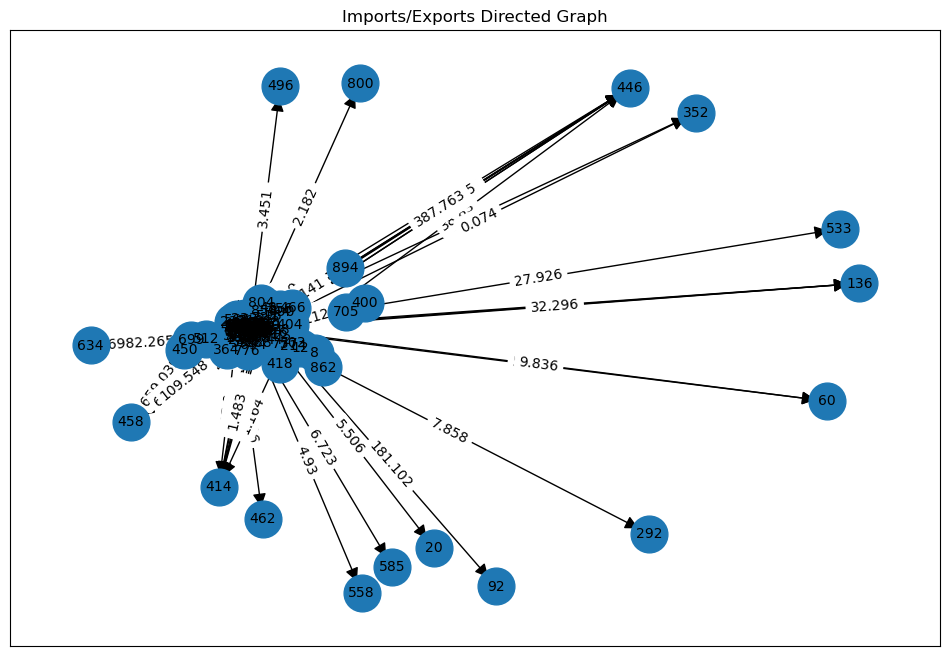

In [28]:
# Draw the G graph (this may not work well for very large graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Imports/Exports Directed Graph")
plt.show()

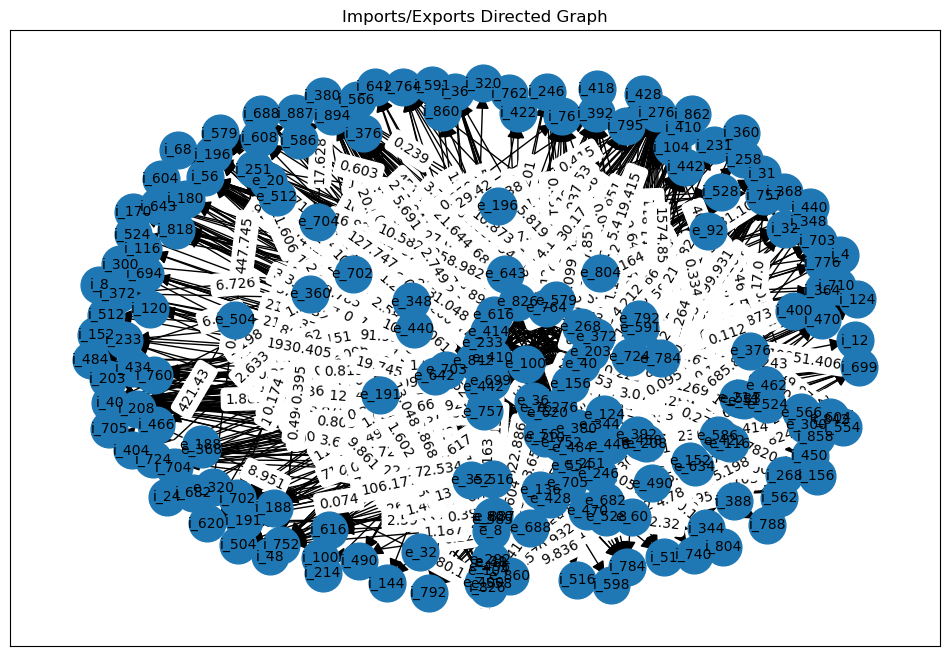

In [29]:
# Draw the B graph (this may not work well for very large graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(B)  # positions for all nodes
nx.draw_networkx_nodes(B, pos, node_size=700)
nx.draw_networkx_edges(B, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(B, pos, font_size=10)
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

plt.title("Imports/Exports Directed Graph")
plt.show()

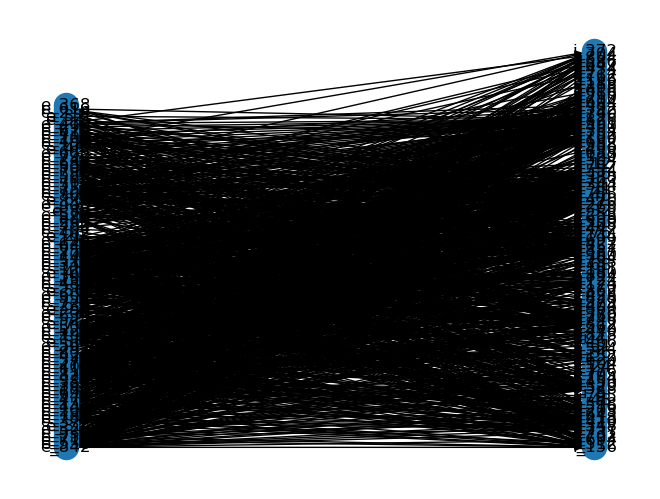

In [30]:
# How to visualise a bipartite set (Should use a smaller sample)

l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos, with_labels = True)
plt.show()

In [31]:
B_importers = bpt.sets(B)[1]
B_exporters = bpt.sets(B)[0]

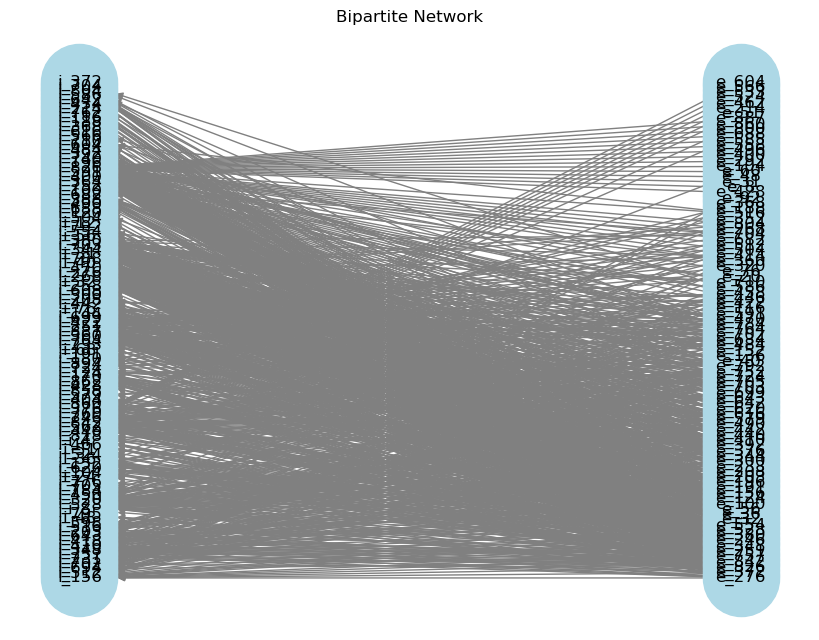

In [32]:
plt.figure(figsize=(8, 6))
pos = nx.bipartite_layout(B, nodes=B_importers)  # Bipartite layout
nx.draw(B, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000)
plt.title("Bipartite Network")
plt.show()


In [33]:
# We remove values below half a million dollars.
threshold = 500
temp_B = nx.Graph((u, v, {'weight': w}) for u, v, w in B.edges(data='weight') if w > threshold)
print(temp_B)

for u, v, weight in temp_B.edges(data='weight'):
    print(f"Edge ({u}, {v}) has weight {weight}")



Graph with 75 nodes and 149 edges
Edge (e_276, i_757) has weight 2395.056
Edge (e_276, i_826) has weight 5600.728
Edge (i_757, e_372) has weight 524.762
Edge (i_757, e_826) has weight 6262.552
Edge (i_757, e_842) has weight 1355.776
Edge (i_757, e_251) has weight 1255.047
Edge (i_757, e_344) has weight 1562.333
Edge (i_757, e_724) has weight 529.643
Edge (i_757, e_792) has weight 711.351
Edge (i_757, e_40) has weight 1599.857
Edge (i_757, e_784) has weight 1999.931
Edge (i_826, e_842) has weight 121961.021
Edge (i_826, e_757) has weight 48769.705
Edge (i_826, e_251) has weight 35958.284
Edge (i_826, e_380) has weight 2277.597
Edge (i_826, e_528) has weight 36954.268
Edge (i_826, e_36) has weight 2783.47
Edge (i_826, e_56) has weight 3123.879
Edge (i_826, e_124) has weight 1067.048
Edge (i_826, e_156) has weight 593.199
Edge (i_826, e_208) has weight 533.287
Edge (i_826, e_344) has weight 48526.99
Edge (i_826, e_392) has weight 2970.195
Edge (i_826, e_410) has weight 1853.588
Edge (i_82

In [34]:
temp_B_importers = bpt.sets(temp_B)[1]
temp_B_exporters = bpt.sets(temp_B)[0]

In [35]:
# Project onto the importer nodes
temp_importer_projection = nx.bipartite.projected_graph(temp_B, temp_B_importers)
# Project onto the exporter nodes
temp_exporter_projection = nx.bipartite.projected_graph(temp_B, temp_B_exporters)


In [48]:
# A test of the different kind of projected graphs possible in networkx
temp_importer_projection_overlap = bpt.overlap_weighted_projected_graph(temp_B, temp_B_importers)

temp_importer_projection_collaboration = bpt.collaboration_weighted_projected_graph(temp_B, temp_B_importers)

temp_importer_projection_weighted = bpt.weighted_projected_graph(temp_B, temp_B_importers)

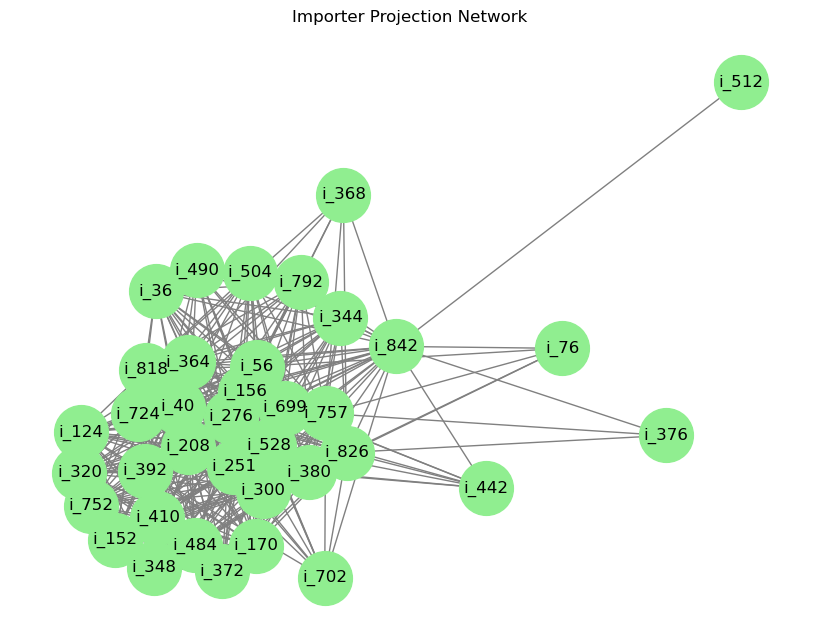

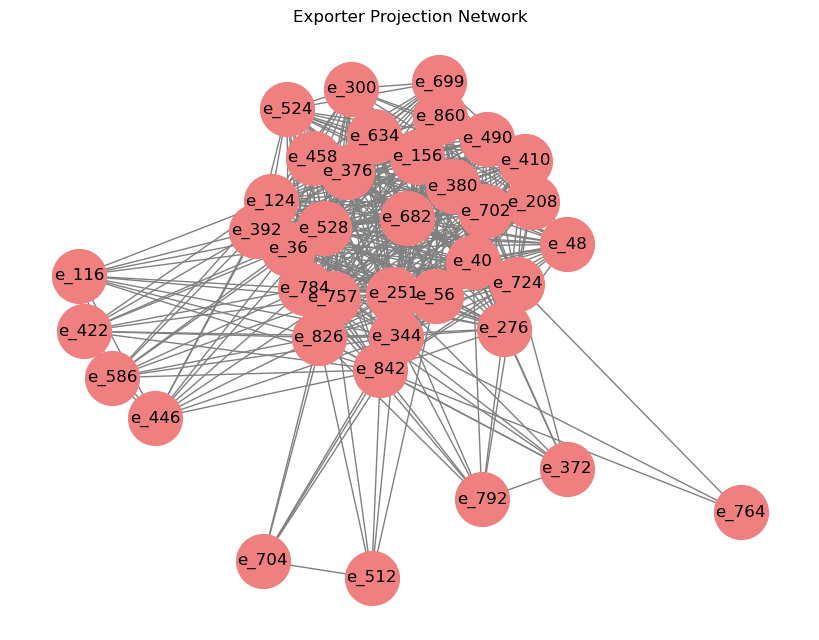

In [36]:
# Step 6: Visualize the projected graph
plt.figure(figsize=(8, 6))
nx.draw(temp_importer_projection, with_labels=True, node_color="lightgreen", edge_color="gray", node_size=1500)
plt.title("Importer Projection Network")
plt.show()

plt.figure(figsize=(8, 6))
nx.draw(temp_exporter_projection, with_labels=True, node_color="lightcoral", edge_color="gray", node_size=1500)
plt.title("Exporter Projection Network")
plt.show()

In [37]:
temp_B_bipar = weightedBiGraph(temp_B)

In [38]:
temp_B_bipar.summary()

The max cardinality matching is: {'e_842': 'i_40', 'e_757': 'i_442', 'e_56': 'i_251', 'e_764': 'i_392', 'e_276': 'i_757', 'e_376': 'i_699', 'e_586': 'i_156', 'e_156': 'i_344', 'e_392': 'i_276', 'e_40': 'i_376', 'e_784': 'i_368', 'e_702': 'i_56', 'e_124': 'i_826', 'e_300': 'i_842', 'e_344': 'i_208', 'e_458': 'i_364', 'e_251': 'i_76', 'e_699': 'i_512', 'e_410': 'i_380', 'e_826': 'i_36', 'i_512': 'e_699', 'i_156': 'e_586', 'i_757': 'e_276', 'i_364': 'e_458', 'i_251': 'e_56', 'i_699': 'e_376', 'i_36': 'e_826', 'i_826': 'e_124', 'i_76': 'e_251', 'i_442': 'e_757', 'i_392': 'e_764', 'i_842': 'e_300', 'i_208': 'e_344', 'i_376': 'e_40', 'i_368': 'e_784', 'i_276': 'e_392', 'i_40': 'e_842', 'i_344': 'e_156', 'i_380': 'e_410', 'i_56': 'e_702'}
The length of this matching is: 40

Our clustering coefficients are: {'e_842': 0.09168270727094258, 'e_757': 0.21707611560552728, 'e_56': 0.3401614434947769, 'e_512': 0.2561793372319688, 'e_764': 0.12444444444444443, 'e_276': 0.29025641025641025, 'e_376': 0.

In [39]:
# LET'S UPDATE THE CLASS 

# Basic diagnostics
print(f"Number of nodes: {temp_B.number_of_nodes()}")
print(f"Number of edges: {temp_B.number_of_edges()}")
print("Degree distribution:", dict(temp_B.degree()))

# Check projections
print("Importer Projection:")
print(dict(temp_importer_projection.degree()))
print("Exporter Projection:")
print(dict(temp_exporter_projection.degree()))

# Centrality checks
print("Betweenness Centrality (Importer Projection):")
print(nx.betweenness_centrality(temp_importer_projection))

# Clustering
print("Clustering Coefficients (Importer Projection):")
print(nx.clustering(temp_importer_projection))


# Centrality checks
print("Betweenness Centrality (Exporter Projection):")
print(nx.betweenness_centrality(temp_exporter_projection))

# Clustering
print("Clustering Coefficients (Exporter Projection):")
print(nx.clustering(temp_exporter_projection))


Number of nodes: 75
Number of edges: 149
Degree distribution: {'e_276': 2, 'i_757': 10, 'i_826': 24, 'e_372': 1, 'e_826': 19, 'i_36': 1, 'i_40': 3, 'i_56': 4, 'i_156': 13, 'i_208': 3, 'i_251': 7, 'i_276': 6, 'i_300': 2, 'i_344': 5, 'i_364': 4, 'i_380': 5, 'i_504': 1, 'i_528': 4, 'i_699': 6, 'i_724': 2, 'i_792': 1, 'i_818': 3, 'i_842': 25, 'e_842': 25, 'i_124': 1, 'i_152': 1, 'i_170': 1, 'i_320': 1, 'i_348': 1, 'i_372': 1, 'i_392': 4, 'i_410': 1, 'i_484': 1, 'i_752': 1, 'e_757': 9, 'i_442': 1, 'e_251': 6, 'i_76': 1, 'e_380': 2, 'e_528': 3, 'e_36': 3, 'e_56': 4, 'e_124': 3, 'e_156': 3, 'e_208': 2, 'e_300': 1, 'e_344': 12, 'i_490': 1, 'i_702': 1, 'e_376': 2, 'e_392': 5, 'e_410': 3, 'e_490': 3, 'e_699': 2, 'i_512': 1, 'e_724': 4, 'e_792': 1, 'e_40': 4, 'i_376': 1, 'e_634': 3, 'e_702': 3, 'e_764': 1, 'e_784': 8, 'i_368': 1, 'e_116': 1, 'e_422': 1, 'e_446': 1, 'e_458': 4, 'e_586': 1, 'e_512': 1, 'e_682': 2, 'e_704': 1, 'e_48': 1, 'e_860': 1, 'e_524': 1}
Importer Projection:
{'i_504': 18, 'i_